

# Project: Wrangle and analyze data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering data</a></li>
<li><a href="#assess">Assessing data</a></li>
<li><a href="#clean">Cleaning data</a></li>
<li><a href="#store">Storing data</a></li>
<li><a href="#final">Exploratory Data Analysis - EDA</a></li>    
</ul>

<a id='intro'></a>
## Introduction

This academic project aims to  wrangle data from [@dog_rates](https://twitter.com/dog_rates) Twitter, also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs), create interesting and trustworthy analyses and visualizations. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

Find below main tasks:

1. Data wrangling, which consists of:

    1.1. Gathering data (downloadable files and querying Twitter API).

    1.2. Assessing data;

    1.3. Cleaning data;


2. Storing, analyzing, and visualizing the wrangled data;


3. Communication and Reporting on my data wrangling efforts, data analysys and visualizations, as well.

In [1]:
#Installing tweepy this command:
!pip install tweepy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Import libraries
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
# Accessing Tweepy keys and token

consumer_key = 'EFGolc9OVWikDK7wuWLJtFwQo'
consumer_secret = 'A0Swo3FXPWsScOfKaRogASOljDp9tDIy9lxBB7A7mo9pgp2KVT'
access_token = '1260883091566080000-RPdofde6tnGpiBwWrEyhPxz5uP4QQx'
access_secret = 'LJ1jeyCSidxP0PpGbfpPeZPzi52En7bLkF4BiKgI712U5'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Wait_on_rate_limit and wait_on_rate_limit_notify are recommended
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 

<a id='gather'></a>
## Gathering Data

In this project I'm going to work with the data below:

1. The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets: **twitter_archive_enhanced.csv**
    
    1.1. DogoDictionary:
         doggo - a big pupper, usually older;
         pupper - a small doggo, usually younger;
         puppo - a transitional phase between doggo to pupper;
         blep - one's tongue protuding ever so slightly from the mouth as an extremely subtle act that occurs;
         snoot - the dog's nose;
         floof - any dog really.
         

2. The tweet image predictions: **image-predictions.tsv**


3. Using the tweet IDs in the WeRateDogs Twitter archive, I'm going to query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 


In [41]:
#Reading the We Rate Dogs Twitter Archive
archive = pd.read_csv('dataset/twitter-archive-enhanced-2.csv')
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [42]:
# Requesting tweet image predictions file
with open('image_predictions.tsv' , 'wb') as file:
    image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
    file.write(image_predictions.content)

In [43]:
# Reading image predictions
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# Collecting data using API  

# Calculate the time of execution
start = time.time()

# Storing ID data in OK or NOK if error 
ok =[]
nok = [] 

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(archive['tweet_id']):
        try:
            tweet_status = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_status._json, file)
            file.write('\n')
            ok.append(tweet_id)
        except Exception as e:
            print(str(tweet_id)+ " _ " + str(e))
            nok.append(tweet_id)
            
end = time.time()
print(end - start)            

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 708


758740312047005698 _ Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=758740312047005698&tweet_mode=extended (Caused by ProxyError('Cannot connect to proxy.', RemoteDisconnected('Remote end closed connection without response',)))
754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 682


676957860086095872 _ Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=676957860086095872&tweet_mode=extended (Caused by ProxyError('Cannot connect to proxy.', RemoteDisconnected('Remote end closed connection without response',)))
1973.3560011386871


In [11]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [12]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [13]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweet_info['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets_data)) 

In [14]:
len(ok)

2329

In [15]:
len(nok)

27

<a id='assess'></a>
## Assessing Data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. 
In this session, I am going to detect and document at least: 
- eight (8) quality issues and 
- two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. 
    
  
To meet specifications, the issues need to satisfy the key points: 
- I only want original ratings (no retweets) that have images. 
- Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

In [16]:
archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,None,None,None,pupper,None
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mauve and Murphy. They're rather ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800751577...,12,10,Mauve,None,None,None,None
2214,668544745690562560,NaN,NaN,2015-11-22 21:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",It is an honor to rate this pup. He is a Snork...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668544745...,10,10,None,None,None,None,None
1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10,10,None,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None
441,819711362133872643,NaN,NaN,2017-01-13 01:03:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Howie. He just bloomed. 11/10 revoluti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819711362...,11,10,Howie,None,None,None,None
1332,705475953783398401,NaN,NaN,2016-03-03 19:32:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Zara. She found a sandal and coul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705475953...,12,10,Zara,None,None,None,None
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
2103,670676092097810432,NaN,NaN,2015-11-28 18:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloo. He's a Westminster Cîroc. Doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670676092...,8,10,Bloo,None,None,None,None
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676582956...,8,10,Vinnie,None,None,None,None


In [17]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [20]:
# Analising if there ares duplicated rows
archive.tweet_id.nunique()

2356

In [21]:
# Analising inconsistency in the rating_numerator column 
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
# Analising inconsistency in the rating_denominator column 
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
# Analising inconsistency in the rating_numerator column (value > "20")
archive_rating = archive.query('(rating_numerator > 20)')
len(archive_rating)

24

In [24]:
archive_rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [25]:
# Analising inconsistency in the rating_numerator column (value > "20")
archive_rating_denominator = archive.query('(rating_denominator != 10)')
len(archive_rating_denominator)

23

In [26]:
archive_rating_denominator

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [27]:
image_predictions.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True
1530,789530877013393408,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
1498,783695101801398276,https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg,3,chow,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True
801,691444869282295808,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,Bernese_mountain_dog,0.767563,True,Border_collie,0.085805,True,EntleBucher,0.043769,True
1059,714982300363173890,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,Brittany_spaniel,0.944376,True,beagle,0.025435,True,Ibizan_hound,0.009962,True
966,706291001778950144,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.587101,True,bull_mastiff,0.164087,True,Staffordshire_bullterrier,0.105011,True
1490,782722598790725632,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
1837,837366284874571778,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
1204,741743634094141440,https://pbs.twimg.com/media/Cksz42EW0AAh2NF.jpg,1,Labrador_retriever,0.786089,True,flat-coated_retriever,0.048652,True,Chesapeake_Bay_retriever,0.034693,True


In [28]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [31]:
image_predictions.tweet_id.nunique()

2075

In [32]:
image_predictions.jpg_url.nunique()

2009

In [33]:
tweet_info.sample(50)

,id,retweet_count,favorite_count,created_at
576,798705661114773508,6813,0,Wed Nov 16 01:54:03 +0000 2016
1716,679462823135686656,18645,31382,Wed Dec 23 00:45:35 +0000 2015
404,822163064745328640,4854,0,Thu Jan 19 19:25:24 +0000 2017
1454,693582294167244802,253,1648,Sat Jan 30 23:51:19 +0000 2016
866,759846353224826880,1995,6780,Sun Jul 31 20:21:02 +0000 2016
1907,674014384960745472,611,1509,Mon Dec 07 23:55:26 +0000 2015
1430,695409464418041856,3565,8644,Fri Feb 05 00:51:51 +0000 2016
1022,743510151680958465,3723,7911,Thu Jun 16 18:26:48 +0000 2016
1189,715200624753819648,1872,5112,Wed Mar 30 15:34:51 +0000 2016
1154,719367763014393856,739,2786,Mon Apr 11 03:33:34 +0000 2016


In [34]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 4 columns):
id                2329 non-null int64
retweet_count     2329 non-null int64
favorite_count    2329 non-null int64
created_at        2329 non-null object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [35]:
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.329000e+03,2329.000000,2329.000000
mean,7.419285e+17,2709.357235,7575.063117
std,6.824683e+16,4581.321063,11756.798180
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,548.000000,1318.000000
50%,7.182469e+17,1269.000000,3293.000000
75%,7.986731e+17,3152.000000,9271.000000
max,8.924206e+17,77947.000000,156426.000000


In [36]:
tweet_info.tail()

,id,retweet_count,favorite_count,created_at
2324,666049248165822465,39,96,Mon Nov 16 00:24:50 +0000 2015
2325,666044226329800704,132,272,Mon Nov 16 00:04:52 +0000 2015
2326,666033412701032449,41,112,Sun Nov 15 23:21:54 +0000 2015
2327,666029285002620928,42,121,Sun Nov 15 23:05:30 +0000 2015
2328,666020888022790149,462,2414,Sun Nov 15 22:32:08 +0000 2015


In [37]:
tweet_info.id.nunique()

2329

<a id='clean'></a>
## Cleaning Data

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted. This data is usually not necessary or helpful when it comes to analyzing data because it may hinder the process or provide inaccurate results.

Data cleaning is not simply about erasing information to make space for new data, but rather finding a way to maximize a data set’s accuracy without necessarily deleting information.

We can consider two key points for Data Cleaning:

- Data Quality  > Accuracy and Consistency 

- Data Tydiness > Structure, Standard and Organise Data  

**1. FINDINDS:**

**1.1. Archive Dataset**

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integer instead of float and there are only 78 rows non-null 
- retweeted_status_timestamp, timestamp should be datetime instead of object
- Some of rating_numerator values are relatively high (24 rows contains value > "20")
- Some of rating_denominator values seems to be inconsistent (23 rows contains value <> "10")
- Several columns contains "None" values (None to NaN)
- Invalid column Name: i.e "None" & "a", "the", "an", etc
- Dog's Stage are organized in 4 columns (doggo, floofer, pupper, puppo)
- We want to keep only original ratings (no retweets) & having images (if in_reply_to_status_id <> "" or retweeted_status_id <> "")

**1.2. Predictions Image Dataset**

- Missing values from images dataset (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url (66 rows)
- There are " _ " and " - " in the column name

**1.3 Json Tweets Dataset**

- created_at should be datetime instead of object (format='%Y-%m-%d %H:%M:%S')

**2. TASKS:**
In this project I'm focusing in Quality & Tidyness as assessing and cleaning the entire dataset completely would require a lot of time and is not necessary to practice and demonstrate your skills in data wrangling.

**2.1. DEFINE Quality Issues**

2.1.1. Replace "a", "the", "an", etc values in the column name to NAN value

2.1.2. Delete retweeted rows and drop the columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id as there are only 78 rows non-null

2.1.3. Change the data type of the columns: timestamp (FROM object TO datetime)

2.1.4. Fixing rating_numerator relatively high

2.1.5. Fixing rating_denominator <> 10

2.1.6. Replace " _ " and " - " in the column name

2.1.7. Replace "None" value to NAN value

2.1.8. Delete Missing values from archive where there is no rows in the images dataset (2075 rows instead of 2356)

**2.2. DEFINE Tidyness Issues**

2.2.1. Create a DogStage column, storing "doggo", "floofer", "pupper", "puppo"

2.2.2. Rename columns name: p1, p1_conf, p1_dog, p2, p2_conf, p2_dog to understable names

In [44]:
# Creating a bkp DataSet in case I'll need to research for any data
archive_bkp = archive.copy()
image_predictions_bkp = image_predictions.copy()
tweet_info_bkp = tweet_info.copy()

In [45]:
# Check for invalid names
archive[archive.name.str.islower() == True].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
mad              2
not              2
getting          2
all              1
old              1
unacceptable     1
space            1
his              1
officially       1
infuriating      1
such             1
life             1
incredibly       1
light            1
my               1
this             1
by               1
Name: name, dtype: int64

- **CLEAN** Issue 2.1.1  

In [46]:
# Replace the invalid names to None
for item in archive.name:
    if item.islower() == True:
        archive.name = archive.name.replace(item, "None")

- **TEST** Issue 2.1.1

In [47]:
# Check for invalid names
archive[archive.name.str.islower() == True].name.value_counts()

Series([], Name: name, dtype: int64)

- **CLEAN** Issue 2.1.2

In [48]:
# We need to remove the retweeted rows. If retweeted_status_id <> "", then it's a retweet, else, it's original.
archive = archive.drop(archive[(archive['in_reply_to_status_id'].isnull() == False) | (archive['retweeted_status_id'].isnull() == False)].index)

In [49]:
# Drop columns
archive = archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

- **TEST** Issue 2.1.2

In [51]:
archive.shape

(2097, 12)

- **CLEAN** Issue 2.1.3

In [52]:
# Changing data type
archive['timestamp'] = pd.to_datetime(archive['timestamp'], format='%Y-%m-%d %H:%M:%S')

- **TEST** Issue 2.1.3

In [53]:
archive.timestamp.describe()

count                    2097
unique                   2097
top       2016-09-12 15:10:21
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

- **CLEAN** Issues 2.1.4 and 2.1.5

**Definition:** 

- Standard are usually between 10/10 and 15/10 
- Some cases seem to be a group of dogs (e.g. a group of 5 dogs with 11/10 rating each would result in a 55/50 rating), then I'll be fixing them and the rating will be standardized to a denominator of 10.
- Some cases are relatively high and makes no sense (e.g. 420/10), then those rows will be dropped and excluded from the analysis.


In [54]:
# ERROR - Deleting inconsistency in Rating
# ERROR - archive = archive.drop(archive[((archive['rating_denominator'] != 10) | (archive['rating_numerator'] > 20))].index)

# standardizing to a denominator of 10 for groups of dogs:
archive['rating_num'] = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(archive['rating_numerator'], archive['rating_denominator'])]
archive['rating_denom'] = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(archive['rating_numerator'], archive['rating_denominator'])]
# drop other columns
archive = archive.drop(['rating_numerator', 'rating_denominator'], axis=1)

# Renaming the columns
archive = archive.rename(columns = {'rating_num': 'rating_numerator', 'rating_denom': 'rating_denominator'})

In [58]:
archive = archive.drop(archive[((archive['rating_denominator'] != 10) | (archive['rating_numerator'] > 20))].index)

- **TEST** Issues 2.1.4 and 2.1.5

In [59]:
# test denominators
archive['rating_denominator'].unique()

array([10])

In [60]:
# test denominators
archive['rating_numerator'].unique()

array([13, 12, 14,  5, 11,  6, 10,  0,  3,  7,  8,  9,  4,  2,  1])

- **CLEAN** Issue 2.1.6

In [62]:
# Updating "_" in the name

image_predictions.p1 = image_predictions.p1.str.replace('_', ' ').str.capitalize()
image_predictions.p2 = image_predictions.p2.str.replace('_', ' ').str.capitalize()
image_predictions.p3 = image_predictions.p3.str.replace('_', ' ').str.capitalize()

- **TEST** Issue 2.1.6

In [63]:
image_predictions.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,Space heater,0.206876,False,Spatula,0.123450,False,Vacuum,0.119218,False
826,693280720173801472,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador retriever,0.340008,True,Bull mastiff,0.175316,True,Box turtle,0.164337,False
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,Redbone,0.243904,True,Beagle,0.210975,True,Vizsla,0.076443,True
1847,839290600511926273,https://pbs.twimg.com/media/C6XBt9XXEAEEW9U.jpg,1,Web site,0.670892,False,Monitor,0.101565,False,Screen,0.075306,False
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,Chow,0.999953,True,Tibetan mastiff,0.000023,True,Dhole,0.000003,False
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,Chow,0.243529,True,Hamster,0.227150,False,Pomeranian,0.056057,True
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French bulldog,0.992833,True,Boston bull,0.004749,True,Pug,0.001392,True
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,Birdhouse,0.541196,False,Can opener,0.121094,False,Carton,0.056137,False
1645,808134635716833280,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,Cocker spaniel,0.740220,True,Dandie dinmont,0.061604,True,English setter,0.041331,True
1860,842163532590374912,https://pbs.twimg.com/media/C6_3QgMWsAMNnAk.jpg,2,French bulldog,0.891227,True,Soccer ball,0.022811,False,Bull mastiff,0.012852,True


- **CLEAN** Issue 2.2.1

In [66]:
#Suggestion
#Concatenate all 4 columns to 1 column dog_stage - figure out - ok

archive.loc[(archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,None,doggo,None,None,puppo,13,10
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,None,doggo,floofer,None,None,11,10
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,Dido,doggo,None,pupper,None,13,10
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,None,doggo,None,pupper,None,12,10
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,Bones,doggo,None,pupper,None,12,10
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,Pinot,doggo,None,pupper,None,10,10
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,None,doggo,None,pupper,None,12,10
889,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,Maggie,doggo,None,pupper,None,12,10
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,None,doggo,None,pupper,None,5,10
1063,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,None,doggo,None,pupper,None,12,10


In [67]:
archive.doggo.value_counts()

None     2008
doggo      83
Name: doggo, dtype: int64

In [68]:
archive.floofer.value_counts()


None       2081
floofer      10
Name: floofer, dtype: int64

In [69]:
archive.pupper.value_counts()

None      1862
pupper     229
Name: pupper, dtype: int64

In [72]:
archive.puppo.value_counts()

None     2067
puppo      24
Name: puppo, dtype: int64

In [73]:
# create the new 'stage' column
archive['dog_stage'] = ['doggo' if 'doggo' in i
                     else 'pupper' if 'pupper' in i
                     else 'floofer' if 'floofer' in i
                     else 'puppo' if 'puppo' in i
                     else np.nan for i in archive['text'].str.lower()]
# turn into categorical
archive['dog_stage'] = archive['dog_stage'].astype('category')

In [74]:
# drop other columns
archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

- **TEST** Issue 2.2.1

In [76]:
archive.dog_stage.value_counts()

pupper     244
doggo       91
puppo       28
floofer      9
Name: dog_stage, dtype: int64

- **CLEAN** Issue 2.1.7

In [77]:
# Replace "None" value to NAN value
archive.replace("None",np.nan)

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,10,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,10,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,10,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,10,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,10,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,13,10,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,13,10,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,13,10,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,13,10,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14,10,doggo


In [78]:
# Replace "None" value to NAN value
archive.replace("",np.nan)

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator,rating_denominator,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13,10,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,10,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,10,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13,10,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,10,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,13,10,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,13,10,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,13,10,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,13,10,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14,10,doggo


- **CLEAN** Issue 2.2.2

In [79]:
# Rename columns
image_predictions = image_predictions.rename(columns = {'p1':'BreedPred1', 'p2':'BreedPred2', 'p3':'BreedPred3', 'p1_conf':'AccuracyPred1', 'p2_conf':'AccuracyPred2', 'p3_conf':'AccuracyPred3', 'p1_dog':'IsDogPred1', 'p2_dog':'IsDogPred2', 'p3_dog':'IsDogPred3'})

In [80]:
tweet_info = tweet_info.rename(columns = {'id': 'tweet_id'})

- **TEST** Issue 2.2.2

In [82]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         2075 non-null int64
jpg_url          2075 non-null object
img_num          2075 non-null int64
BreedPred1       2075 non-null object
AccuracyPred1    2075 non-null float64
IsDogPred1       2075 non-null bool
BreedPred2       2075 non-null object
AccuracyPred2    2075 non-null float64
IsDogPred2       2075 non-null bool
BreedPred3       2075 non-null object
AccuracyPred3    2075 non-null float64
IsDogPred3       2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id='store'></a>
## Storing Data

Data Sorage is defined as a way of keeping data in the memory storage. In this project, I'm going to store the cleaned DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

- **CLEAN** Issue 2.1.8

**Definition** - when merging the datasets using "inner" option, automatically all rows that have no image will be excluded

In [83]:
tweet_data_master = pd.merge(archive, image_predictions, on = 'tweet_id', how = 'inner')

In [84]:
tweet_data_master_02 = pd.merge(tweet_data_master, tweet_info, on = 'tweet_id', how = 'inner')

In [85]:
#Recommended using index=False
tweet_data_master_02.to_csv('twitter_archive_master.csv', index=False)

- **TEST** Issue 2.1.8

In [87]:
tweet_data_master_02.shape

(1956, 23)

<a id='final'></a>
## Exploratory Data Analysis - EDA

Now that the dataset is ready for analysis, I'm going to analyze and explore its content and collect some additional information from it.

In [88]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('twitter_archive_master.csv')

In [90]:
df.shape

(1956, 23)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 23 columns):
tweet_id              1956 non-null int64
timestamp             1956 non-null object
source                1956 non-null object
text                  1956 non-null object
expanded_urls         1956 non-null object
name                  1956 non-null object
rating_numerator      1956 non-null int64
rating_denominator    1956 non-null int64
dog_stage             334 non-null object
jpg_url               1956 non-null object
img_num               1956 non-null int64
BreedPred1            1956 non-null object
AccuracyPred1         1956 non-null float64
IsDogPred1            1956 non-null bool
BreedPred2            1956 non-null object
AccuracyPred2         1956 non-null float64
IsDogPred2            1956 non-null bool
BreedPred3            1956 non-null object
AccuracyPred3         1956 non-null float64
IsDogPred3            1956 non-null bool
retweet_count         1956 non-null int64

In [92]:
# shows the top 10 represented dog breeds in the dataset
df['BreedPred1'].value_counts()[:10]

Golden retriever      136
Labrador retriever     91
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                39
Pomeranian             37
Toy poodle             36
Malamute               29
Name: BreedPred1, dtype: int64

In [104]:
# shows descriptive information about the dog's ratings
df['rating_numerator'].describe()

count    1956.000000
mean       10.523517
std         2.183865
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

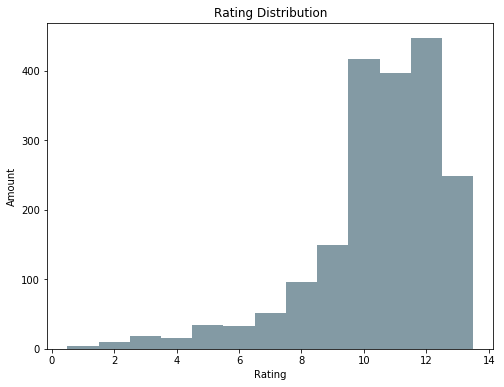

In [105]:
# the distribution of ratings on a histogram
plt.figure(figsize=[8,6])
plt.hist(df['rating_numerator'], bins=np.arange(0.5, 14.5, 1), alpha=0.8, color='#64818e')
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.title('Rating Distribution');

In [106]:
# shows descriptive information about favorite counts
tweet_info['favorite_count'].describe()

count      2329.000000
mean       7575.063117
std       11756.798180
min           0.000000
25%        1318.000000
50%        3293.000000
75%        9271.000000
max      156426.000000
Name: favorite_count, dtype: float64

In [107]:
# shows descriptive information about retweet counts
df['retweet_count'].describe()

count     1956.000000
mean      2473.951943
std       4428.511753
min         11.000000
25%        553.000000
50%       1194.500000
75%       2829.500000
max      77947.000000
Name: retweet_count, dtype: float64

**QUESTIONS**

1. The highest ratings per dog breed on average
2. The highest ratings per dog stage on average
3. The highest favorite count per dog breed on average
4. The highest favorite count per dog stage on average

In [108]:
# groups the dataset by dog breeds and computes the average rating for each group
breed_groups = df.groupby('BreedPred1')['rating_numerator'].mean()

# filters out dog breed that appear less than 10 times
breed_groups = breed_groups[df['BreedPred1'].value_counts() > 10].sort_values(ascending=False)
breed_groups

BreedPred1
Web site                          12.214286
Eskimo dog                        11.777778
Samoyed                           11.743590
Chow                              11.609756
Golden retriever                  11.536765
Cardigan                          11.529412
Great pyrenees                    11.500000
Kelpie                            11.454545
Pembroke                          11.443182
Cocker spaniel                    11.296296
Siberian husky                    11.250000
French bulldog                    11.240000
Pomeranian                        11.189189
Rottweiler                        11.187500
Basset                            11.153846
Pekinese                          11.153846
Labrador retriever                11.098901
Toy poodle                        11.027778
German shepherd                   11.000000
Kuvasz                            11.000000
Old english sheepdog              10.909091
Malamute                          10.896552
Vizsla               

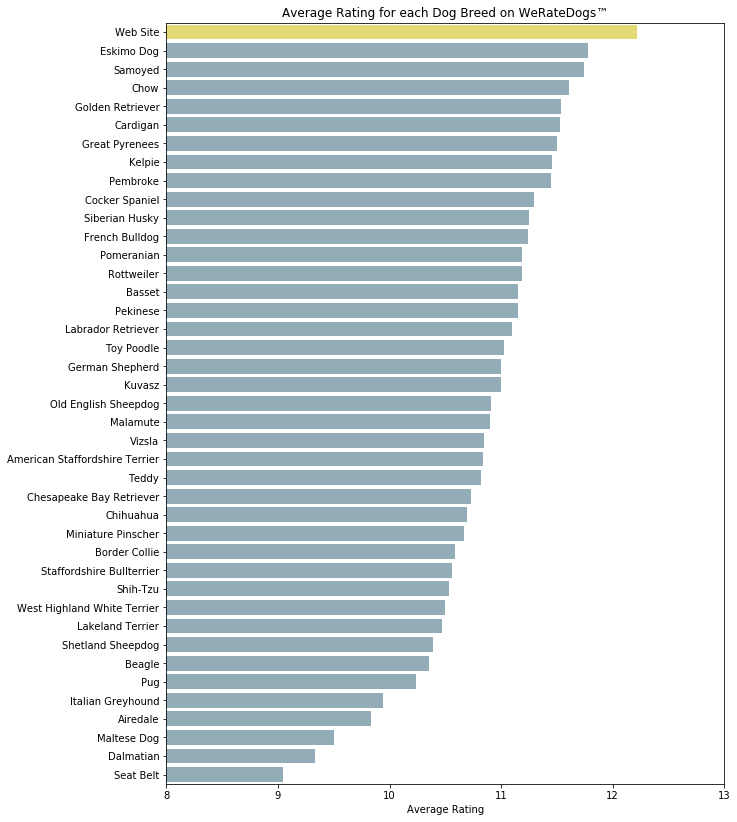

In [109]:
# 1. The highest ratings per dog breed on average

# define axis values
x_axis = list(breed_groups)
y_axis = [i.title() for i in breed_groups.index]

# plot the bar chart
plt.figure(figsize=[10,14])
plt.xlim(8,13)
plt.xlabel('Average Rating')
plt.title('Average Rating for each Dog Breed on WeRateDogs™')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, palette=colors)
plt.show();

In [110]:
# groups the dataset by dog stages and computes the average rating for each group
stage_groups = df.groupby('dog_stage')['rating_numerator'].mean()

# sorts the stage groups by descending order
stage_groups = stage_groups.sort_values(ascending=False)
stage_groups

dog_stage
puppo      12.076923
floofer    12.000000
doggo      11.730769
pupper     10.600897
Name: rating_numerator, dtype: float64

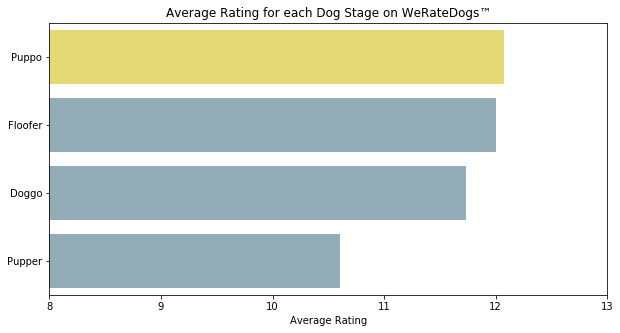

In [111]:
# define axis values
x_axis = list(stage_groups)
y_axis = [i.title() for i in stage_groups.index]

# plot the bar chart
plt.figure(figsize=[10,5])
plt.xlim(8,13)
plt.xlabel('Average Rating')
plt.title('Average Rating for each Dog Stage on WeRateDogs™')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();

In [112]:
# groups the dataset by dog breeds and computes the average favorite count for each group
breed_groups_fav = df.groupby('BreedPred1')['favorite_count'].mean()

# filters out dog breed that appear less than 10 times
breed_groups_fav = breed_groups_fav[df['BreedPred1'].value_counts() > 10].sort_values(ascending=False)
breed_groups_fav

BreedPred1
French bulldog                    17512.360000
Web site                          16288.285714
Cardigan                          14009.294118
Eskimo dog                        13573.222222
Lakeland terrier                  12847.933333
Basset                            12761.000000
Samoyed                           12315.589744
Great pyrenees                    11762.357143
Golden retriever                  11569.044118
Labrador retriever                10822.043956
Cocker spaniel                    10690.629630
Pembroke                          10576.488636
Chesapeake bay retriever           9857.909091
Kelpie                             9319.454545
German shepherd                    9287.800000
Chow                               9270.560976
Chihuahua                          8232.923077
Border collie                      8216.750000
Miniature pinscher                 8171.285714
Malamute                           8044.862069
Italian greyhound                  7982.250000
Sh

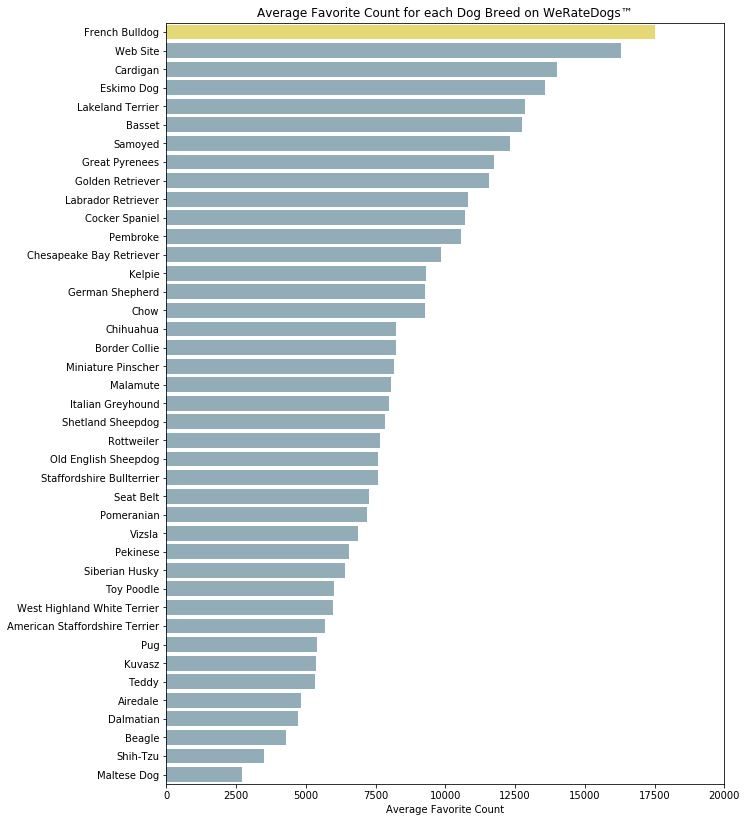

In [113]:
# define axis values
x_axis = list(breed_groups_fav)
y_axis = [i.title() for i in breed_groups_fav.index]

# plot the bar chart
plt.figure(figsize=[10,14])
plt.xlim(0, 20000)
plt.xlabel('Average Favorite Count')
plt.title('Average Favorite Count for each Dog Breed on WeRateDogs™')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();

In [114]:
# groups the dataset by dog stages and computes the average favorite count for each group
stage_groups_fav = df.groupby('dog_stage')['favorite_count'].mean()

# sorts the stage groups by descending order
stage_groups_fav = stage_groups_fav.sort_values(ascending=False)
stage_groups_fav

dog_stage
puppo      21096.653846
doggo      17691.589744
floofer    12076.857143
pupper      6604.430493
Name: favorite_count, dtype: float64

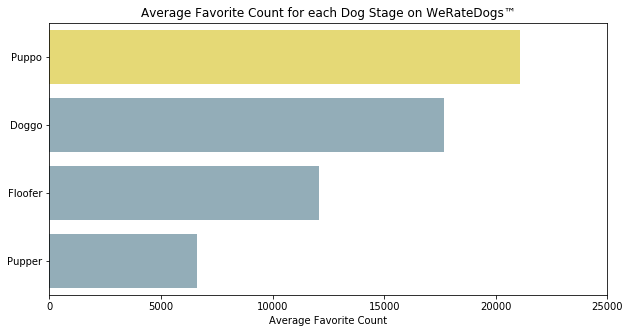

In [115]:
# define axis values
x_axis = list(stage_groups_fav)
y_axis = [i.title() for i in stage_groups_fav.index]

# plot the bar chart
plt.figure(figsize=[10,5])
plt.xlim(0,25000)
plt.xlabel('Average Favorite Count')
plt.title('Average Favorite Count for each Dog Stage on WeRateDogs™')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();